In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import random
import seaborn as sns
import numpy as np

#importing  TSNE
from sklearn.manifold import TSNE

LOADING DATA 

In [3]:
original_data = pd.read_csv("data/ObesityDataSet.csv")
original_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


DATA PREPARATION

In [4]:
data = original_data.copy()
data = data.replace({"yes": 1, "no": 0, "Sometimes": 0.25, "Frequently": 0.75, "Always": 1, "Male": 1, "Female": 0})
mtrans = ["Automobile", "Public_Transportation", "Motorbike", "Bike", "Walking"]
for i in mtrans:
    data[i] = 0
    data.loc[data["MTRANS"] == i, i] = 1
data.drop(columns=["MTRANS", "NObeyesdad"], inplace=True)
data 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Public_Transportation,Motorbike,Bike,Walking
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0.25,0,2.000000,0,0.000000,1.000000,0.00,0,1,0,0,0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,0.25,1,3.000000,1,3.000000,0.000000,0.25,0,1,0,0,0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,0.25,0,2.000000,0,2.000000,1.000000,0.75,0,1,0,0,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,0.25,0,2.000000,0,2.000000,0.000000,0.75,0,0,0,0,1
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,0.25,0,2.000000,0,0.000000,0.000000,0.25,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,0.25,0,1.728139,0,1.676269,0.906247,0.25,0,1,0,0,0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,0.25,0,2.005130,0,1.341390,0.599270,0.25,0,1,0,0,0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,0.25,0,2.054193,0,1.414209,0.646288,0.25,0,1,0,0,0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,0.25,0,2.852339,0,1.139107,0.586035,0.25,0,1,0,0,0


CONVERTING DATA INTO THE STANDARD FORM

In [5]:
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(data)
standard_data = pd.DataFrame(data_scaled, columns=data.columns)
standard_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Public_Transportation,Motorbike,Bike,Walking
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,-0.353309,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,-1.233942,-0.525642,0.579721,-0.072375,-0.05768,-0.165078
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,-0.353309,6.853997,1.618759,4.581439,2.339750,-1.080625,0.378969,-0.525642,0.579721,-0.072375,-0.05768,-0.165078
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,-0.353309,-0.145900,-0.013073,-0.218272,1.163820,0.561997,3.604792,-0.525642,0.579721,-0.072375,-0.05768,-0.165078
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,-0.353309,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,3.604792,-0.525642,-1.724969,-0.072375,-0.05768,6.057758
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,-0.353309,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,0.378969,-0.525642,0.579721,-0.072375,-0.05768,-0.165078


DIMENSIONAL REDUCTION: 16 -> 2 ATTRIBUTES

In [6]:
tsne = TSNE(n_components = 2, random_state = 1)    # Applying the TSNE algorithm with random state = 1
data_tsne = tsne.fit_transform(standard_data)      # Fitting and transforming tsne function on the scaled data
data_tsne = pd.DataFrame({"Param1" : data_tsne[:, 0], "Param2" : data_tsne[:, 1]})  # Conversion to dataframe

data_tsne

,Param1,Param2
0,4.932301,25.342035
1,-13.882968,15.271078
2,2.727084,16.438276
3,26.063828,51.865047
4,9.676523,17.677881
...,...,...
2106,-1.525903,-52.781513
2107,-4.225165,-55.043186
2108,-4.278221,-55.031757
2109,-16.910213,-61.741066


APPLYING THE K-MEANS ALGORITHM AND ASSIGNING THE RESULT 

In [7]:
km = KMeans(init="random", n_clusters=7)
predicted = km.fit_predict(data_tsne)
data_tsne['cluster'] = predicted
original_data["cluster"] = predicted

data_tsne

c:\Users\jurok\anaconda3\envs\AI-unsupervised\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Param1,Param2,cluster
0,4.932301,25.342035,5
1,-13.882968,15.271078,5
2,2.727084,16.438276,5
3,26.063828,51.865047,6
4,9.676523,17.677881,5
...,...,...,...
2106,-1.525903,-52.781513,2
2107,-4.225165,-55.043186,2
2108,-4.278221,-55.031757,2
2109,-16.910213,-61.741066,2


PLOTTING THE GROUPED DATA

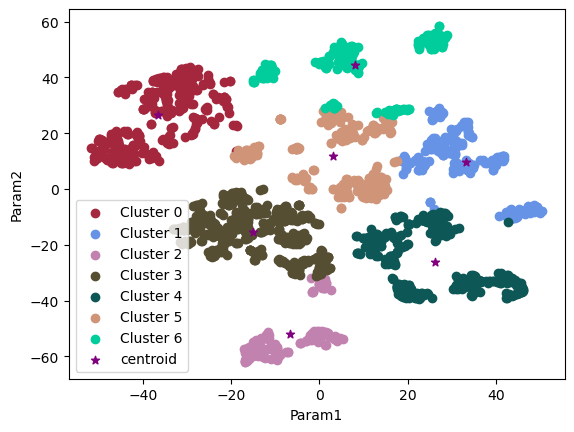

In [8]:
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))


for i in range(7):
    cluster = data_tsne[data_tsne.cluster==i] 
    plt.scatter(cluster["Param1"], cluster["Param2"], color=random_color(), label=f'Cluster {i}') 

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Param1')
plt.ylabel('Param2')
plt.legend()
plt.show()

In [12]:
# Adjust pandas display settings
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't truncate display width
pd.set_option('display.max_colwidth', None) # Don't truncate column width

# data

In [62]:
# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

CHECKING WHAT ACTUAL OBESITY LEVELS EACH CLUSTER HAS

In [80]:
clusters = []
for i in range(7):
    clusters.append(original_data[original_data.cluster == i])

obesity_levels = ["Predominant","Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

analysis = pd.DataFrame({"Obesity_levels" : obesity_levels,
                         "0" : 0,
                         "1" : 0,
                         "2" : 0,
                         "3" : 0,
                         "4" : 0,
                         "5" : 0,
                         "6" : 0,}
                        )





for i in range(7):
    for j in range(1, 8):
        sum = (clusters[i]["NObeyesdad"] == obesity_levels[j]).sum()
        analysis.at[j, str(i)] = sum
    
    # Find the maximum value in the column (excluding the 'Predominant' row)
    max_count = analysis.loc[1:, str(i)].max()
    # Find the row index where the maximum count occurs
    max_index = analysis.loc[1:, str(i)].idxmax()
    # Get the corresponding obesity level from the 'Obesity_levels' column using the index
    corresponding_level = analysis.at[max_index, 'Obesity_levels']
    

    analysis.at[0, str(i)] = f'{corresponding_level}-{max_count}'


analysis

C:\Users\jurok\AppData\Local\Temp\ipykernel_32476\3215790402.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Obesity_Type_I-109' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  analysis.at[0, str(i)] = f'{corresponding_level}-{max_count}'
C:\Users\jurok\AppData\Local\Temp\ipykernel_32476\3215790402.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Insufficient_Weight-95' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  analysis.at[0, str(i)] = f'{corresponding_level}-{max_count}'
C:\Users\jurok\AppData\Local\Temp\ipykernel_32476\3215790402.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Obesity_Type_III-143' has dtype incompatible with int64, please explicitly cast to a compatible 

,Obesity_levels,0,1,2,3,4,5,6
0,Predominant,Obesity_Type_I-109,Insufficient_Weight-95,Obesity_Type_III-143,Obesity_Type_II-130,Obesity_Type_III-179,Normal_Weight-94,Insufficient_Weight-90
1,Insufficient_Weight,0,95,5,24,1,57,90
2,Normal_Weight,34,68,0,15,16,94,60
3,Overweight_Level_I,62,40,1,70,50,23,44
4,Overweight_Level_II,90,4,7,85,13,70,21
5,Obesity_Type_I,109,2,20,108,95,13,4
6,Obesity_Type_II,92,54,0,130,1,18,2
7,Obesity_Type_III,1,0,143,0,179,1,0


In [109]:


commute = ["Predominant",'Public_Transportation', 'Walking', 'Automobile', 'Motorbike','Bike']

analysis2 = pd.DataFrame({"Modes of Transport" : commute,
                         "0" : 0,
                         "1" : 0,
                         "2" : 0,
                         "3" : 0,
                         "4" : 0,}  
                        )


for i in range(7):
    for j in range(1, 6):
        sum = (clusters[i]["MTRANS"] == commute[j]).sum()
        analysis2.at[j, str(i)] = sum
    
    # Find the maximum value in the column (excluding the 'Predominant' row)
    max_count = analysis2.loc[1:, str(i)].max()
    # Find the row index where the maximum count occurs
    max_index = analysis2.loc[1:, str(i)].idxmax()
    # Get the corresponding obesity level from the 'Obesity_levels' column using the index
    corresponding_level = analysis2.at[max_index, 'Modes of Transport']
    

    analysis2.at[0, str(i)] = f'{corresponding_level}-{max_count}'


analysis2


C:\Users\jurok\AppData\Local\Temp\ipykernel_32476\2272245023.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Automobile-388' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  analysis2.at[0, str(i)] = f'{corresponding_level}-{max_count}'
C:\Users\jurok\AppData\Local\Temp\ipykernel_32476\2272245023.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Public_Transportation-263' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  analysis2.at[0, str(i)] = f'{corresponding_level}-{max_count}'
C:\Users\jurok\AppData\Local\Temp\ipykernel_32476\2272245023.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Public_Transportation-176' has dtype incompatible with int64, please explicitly cast to a compa

,Modes of Transport,0,1,2,3,4,5,6
0,Predominant,Automobile-388,Public_Transportation-263,Public_Transportation-176,Public_Transportation-432,Public_Transportation-355,Public_Transportation-247.0,Public_Transportation-107.0
1,Public_Transportation,0,263,176,432,355,247.0,107.0
2,Walking,0,0,0,0,0,0.0,56.0
3,Automobile,388,0,0,0,0,11.0,58.0
4,Motorbike,0,0,0,0,0,11.0,0.0
5,Bike,0,0,0,0,0,7.0,0.0
